### Exploratory analysis and Linear regression

### Work with Russia ( no.643 )

In [1]:
%run -i imports.py
with open("only_rus.pck", "br") as f:
    df_r=pickle.load(f)

In [2]:
len(df_r)

1810

| Question | Meaning | Range | Possible answers type
| --- | --- | --- | --- |
| "H_URBRURAL" | Urban-Rural Settlement type | 1.- Urban, 2.- Rural | one-hot! |
| "Q1" | Importance in life: Family | 1.- Very important, 4.- Not at all important | continuous |
|"Q3" |  Importance in life: Leisure time |1.- Very important, 4.- Not at all important| continuous |
|"Q5" |  Importance in life: Work |1.- Very important, 4.- Not at all important| continuous |
|"Q18" | Neighbors: Drug addicts | 1.- Mentioned, 2.- Not mentioned | one-hot! |
|"Q19" | Neighbors: People of a different race | 1.- Mentioned, 2.- Not mentioned | one-hot! |
|"Q20" | Neighbors: People who have AIDS |1.- Mentioned, 2.- Not mentioned | one-hot! |
|"Q21" | Neighbors: Immigrants/foreign workers | 1.- Mentioned, 2.- Not mentioned | one-hot! |
|"Q22" | Neighbors: Homosexuals |1.- Mentioned, 2.- Not mentioned | one-hot! |
|"Q23" | Neighbors: People of a different religion | 1.- Mentioned, 2.- Not mentioned | one-hot! |
|"Q24" | Neighbors: Heavy drinkers | 1.- Mentioned, 2.- Not mentioned | one-hot! |
|"Q33" | Jobs scarce: Men should have more right to a job than women |1.- Agree strongly 5. Disagree strongly |continuous|
|"Q47" | State of health (subjective) | 1.- Very good, 5.- Very poor |continuous|
|"Q58" | How much you trust: Your family | 1.- Trust completely 4.- Do not trust at all | continuous |
|"Q67" | Confidence: Television | 1.- A great deal 4.- None at all | continuous |
|"Q69" | Confidence: The Police | 1.- A great deal 4.- None at all | continuous |
|"Q108"| Government ́s vs individual ́s responsibility |1.- governments responsibility, 10.- People responsibility | continuous |
|"Q109"| Competition good or harmful |1.- Competition is good, 10.- Competition is harmful | continuous |
|"Q138"| Frequency in your neighborhood: Sexual harassment |1.- Very Frequently, 4.- Not at all frequently | continuous | 
|"Q161"| One of the bad effects of science is that it breaks down people's ideas of right and wrong |1.- Completely disagree, 10-comletely agree | continuous |
|"Q172"| Apart from weddings and funerals, about how often do you pray? |1-often, 8-never | continuous |
|"Q206"| Information source: Internet |1.- Daily, 5.- Never | continuous |
|"Q213"| Social activism: Donating to a group or campaign |1.- Have done 2.- Might do 3.- Would never do | continuous |
|"Q238"| Political system: Having a democratic political system |1.- Very good 2.- Fairly good 3.- Fairly bad 4.- Very bad | continuous |
|"Q252"| Satisfaction with the political system performance |1 means not satisfied at all and 10 means completely satisfied | continuous |
|"Q260"| Sex | 1.- Male 2.- Female | one hot|
|"Q262"| age | ... | continuous
|"Q262sq"| age squared | ... | continuous 
|"Q263"|Respondent immigrant | 1.- I am born in this country, 2.- I am an immigrant | one-hot |
|"Q271"| Do you live with your parents | 1.- No 2.- Yes, own parent(s) 3.- Yes, parent(s) in law 4.- Yes, both own parent(s) and parent(s) | one-hot |
|"Q273"| Marital status | 1.- Married 2.- Living together as married 3.- Divorced 4.- Separated 5.- Widowed 6.- Single (1,2 yes ; 3,4,5,6 no) | one-hot|
|"Q274"| number of kids | 0.- No children 1.- 1 child 2.- 2 children 3.- 3 children 4.- 4 children 5.- 5 children 6.- 6 children 7-25.- 7 or more children | continuous |
|"Q275R"|Highest educational level: Respondent (recoded into 4 groups) | 1.- Primary 2.- Secondary 3.- Post-secondary 4.- Tertiary | continuous |
|"Q279"| Employment status | 1.- Full time (30 hours a week or more) 2.- Part time (less than 30 hours a week) 3.- Self employed 4.- Retired/pensioned 5.- Housewife not otherwise employed 6.- Student 7.- Unemployed 8.- Other. (1,2,3 yes ; 4,5,6,7, 8 no) |one hot |
|"Q288"| Scale of incomes | 1 indicates the lowest income group and 10 the highest income group in your country | continuous|

Dependent vars: <br>

| Question | Meaning | Range | Possible answers type
| --- | --- | --- | --- |
|"Q185"| Justifiable: Divorce | 1.- Never justifiable, 10.- Always justifiable | continuous |
|"Q186"| Justifiable: Sex before marriage | 1.- Never justifiable, 10.- Always justifiable | continuous |


No need:<br>

| Question | Meaning | Range | Possible answers type
| --- | --- | --- | --- |
|"Q25"| Neighbors: Unmarried couples living together |1.- Mentioned 2.- Not mentioned | ... |
|"Q26"| Neighbors: People who speak a different language |1.- Mentioned 2.- Not mentioned | ...|


In [4]:
# df_r

In [3]:
df_nec = df_r[["H_URBRURAL","Q1", "Q3", "Q5","Q18","Q19", "Q20","Q21","Q22","Q23","Q24","Q33","Q47","Q58","Q67","Q69",
"Q108","Q109","Q138","Q161","Q172","Q206","Q213","Q238","Q252","Q260","Q262","Q263","Q271","Q273","Q274","Q275R",
"Q279","Q288", "Q185","Q186"]].copy()

#### Missing values

In [6]:
# df_nec.isna().sum()
#number of missing values in each column 
print("\033[93m-1 Don't know")
print("-2 No answer")
print("-5 Missing; Not available\033[0m", end="\n\n")

for col in df_nec.columns:    
    series = df_nec[df_nec[col] < 0][col].value_counts()
    if not series.empty:
        print(f"\033[92m{col}, {d[col]}\033[0m")
        print(series)
        print()

-1 Don't know
-2 No answer
-5 Missing; Not available

Q1, Importance in life: Family
-1    7
-2    1
Name: Q1, dtype: int64

Q3, Importance in life: Leisure time
-1    16
-2     1
Name: Q3, dtype: int64

Q5, Importance in life: Work
-1    13
-2     1
Name: Q5, dtype: int64

Q33, Jobs scarce: Men should have more right to a job than women
-1    17
Name: Q33, dtype: int64

Q47, State of health (subjective)
-1    6
Name: Q47, dtype: int64

Q58, How much you trust: Your family
-1    4
-2    1
Name: Q58, dtype: int64

Q67, Confidence: Television
-1    20
-2     1
Name: Q67, dtype: int64

Q69, Confidence: The Police
-1    48
-2     3
Name: Q69, dtype: int64

Q108, Government ́s vs individual ́s responsibility
-1    17
-2     2
Name: Q108, dtype: int64

Q109, Competition good or harmful
-1    100
Name: Q109, dtype: int64

Q138, Frequency in your neighborhood: Sexual harassment
-1    200
-2      6
Name: Q138, dtype: int64

Q161, One of the bad effects of science is that it breaks down people's

[1 2]


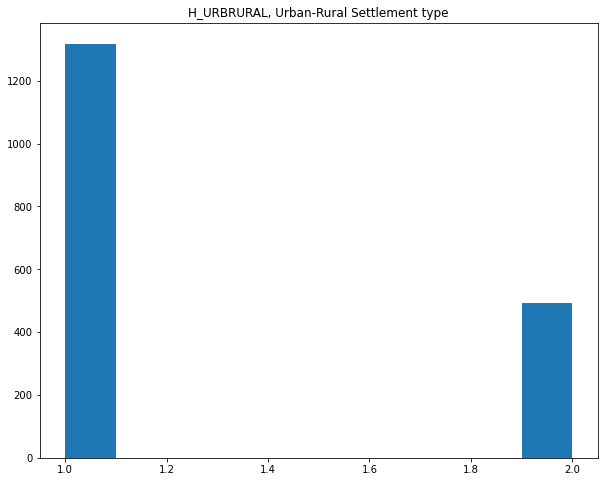

[ 1  2  3  4 -1 -2]


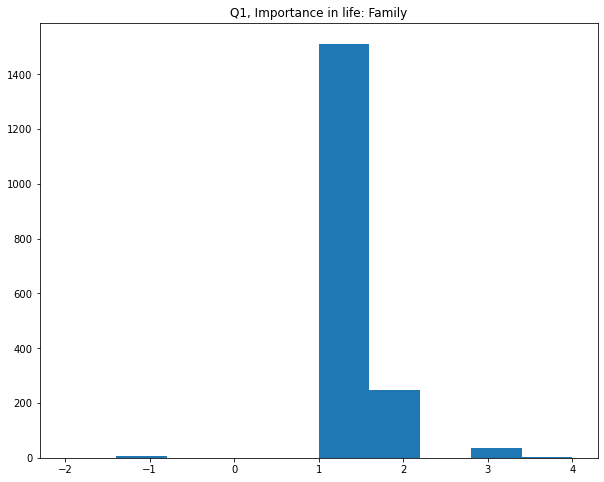

[ 1  2  3  4 -1 -2]


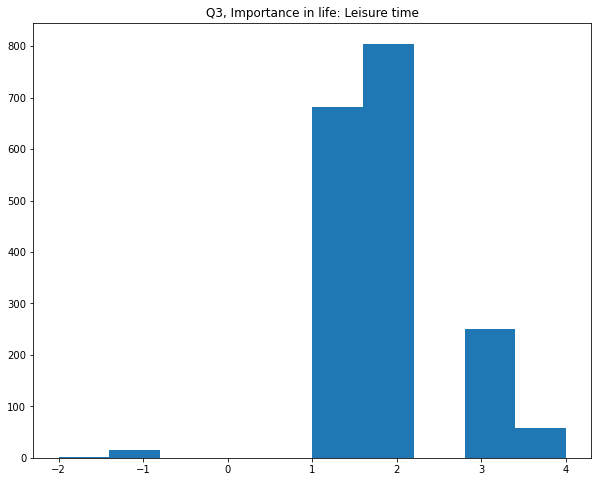

[ 2  1  3 -1  4 -2]


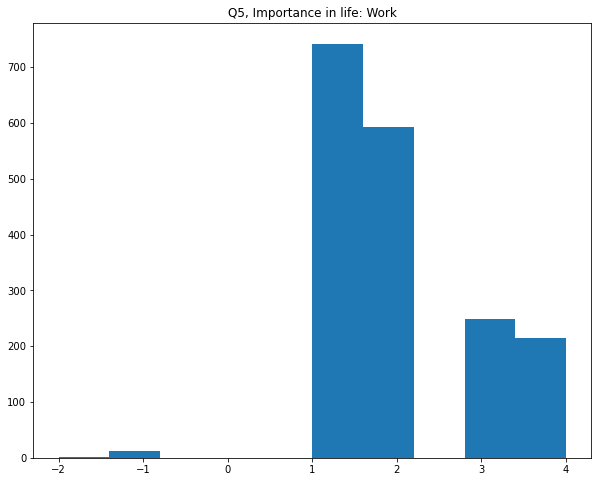

[1 2]


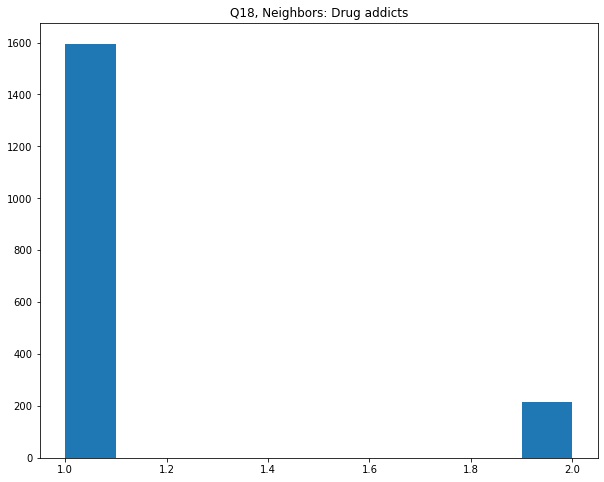

[2 1]


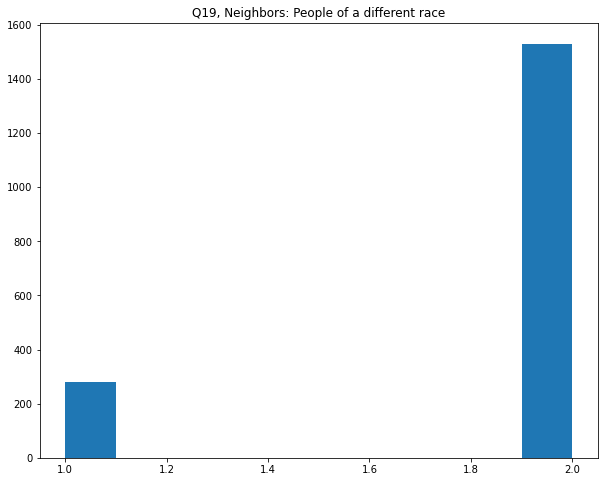

[1 2]


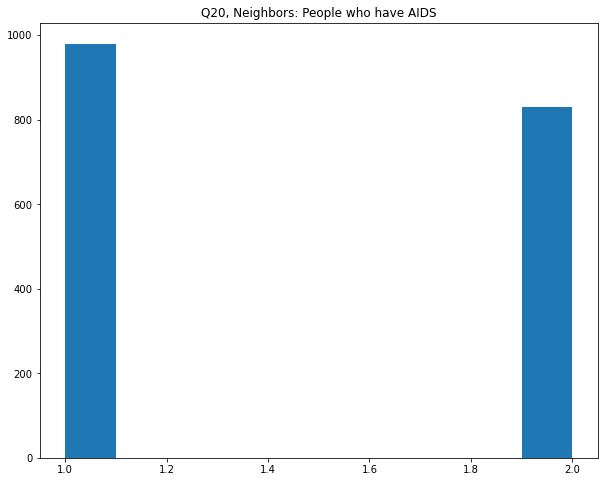

[2 1]


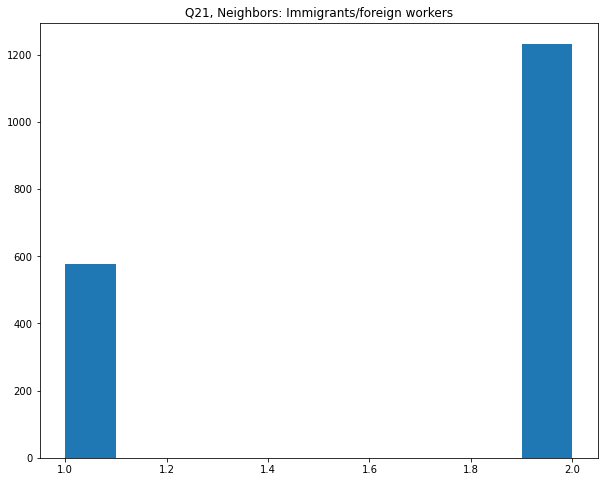

[1 2]


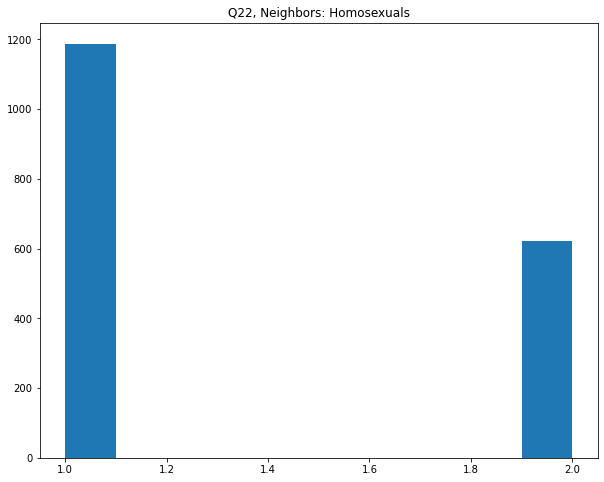

[2 1]


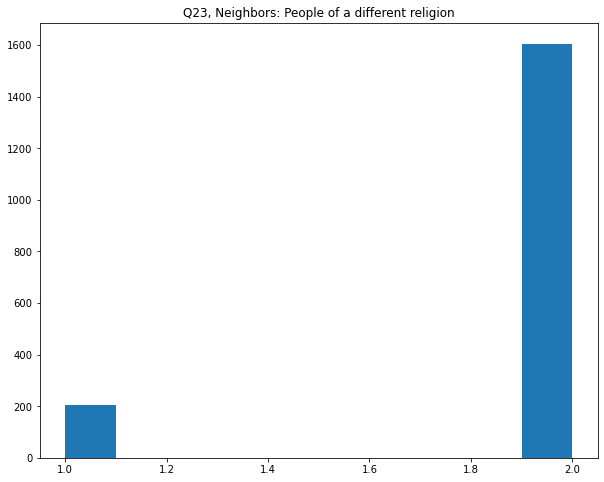

[1 2]


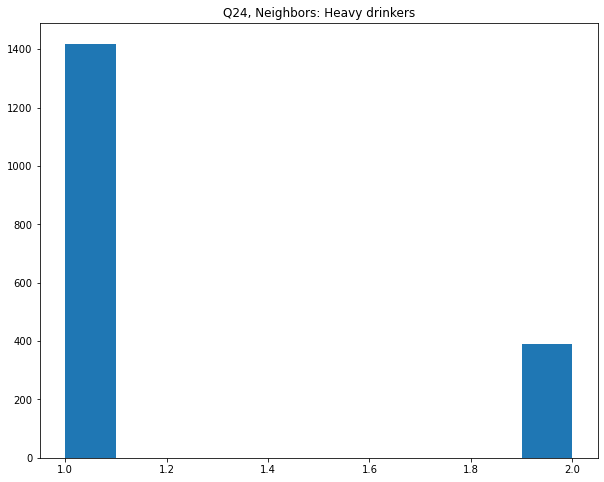

[ 2  4  5  3  1 -1]


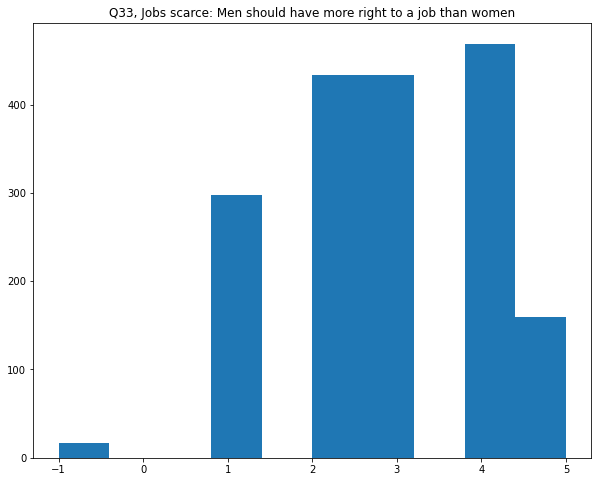

[ 1  2  3  5  4 -1]


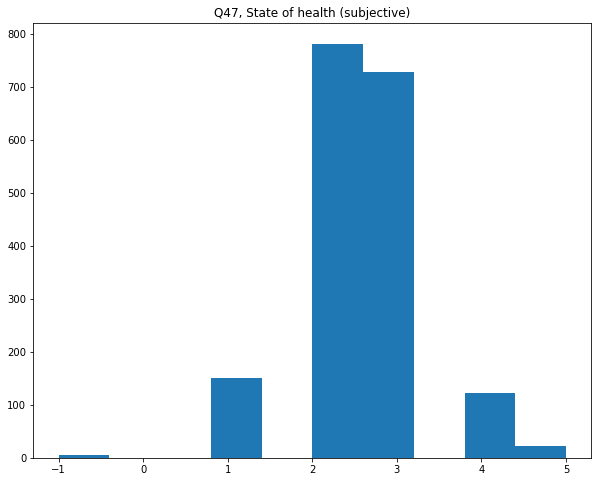

[ 1  2  3  4 -1 -2]


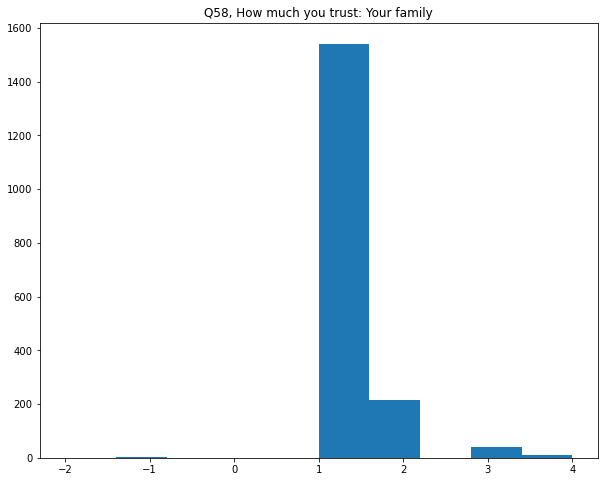

[ 2  1  4  3 -1 -2]


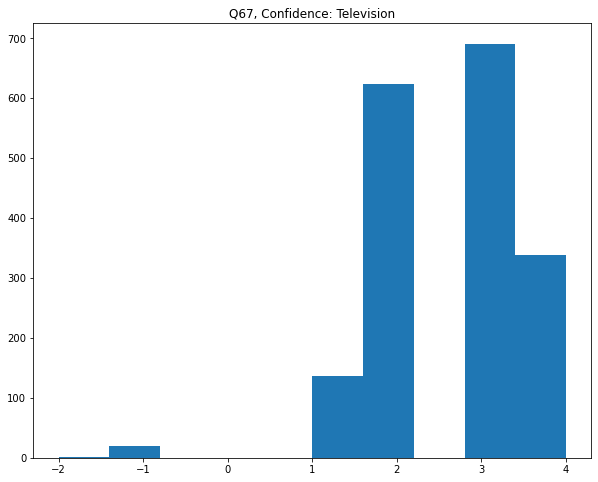

[ 3  2  1  4 -2 -1]


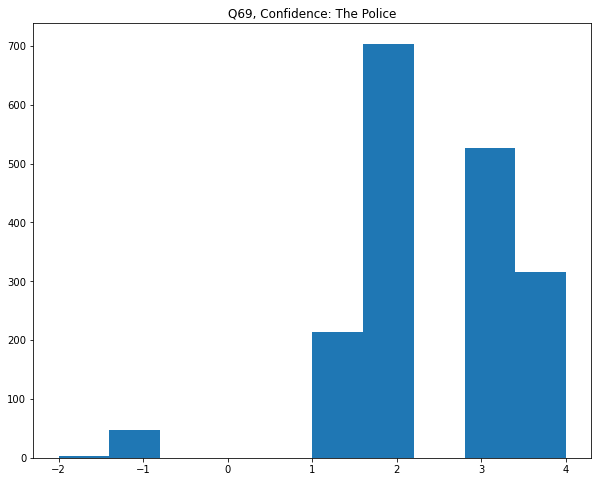

[ 1  2 10  7  5  6  4  3  8  9 -1 -2]


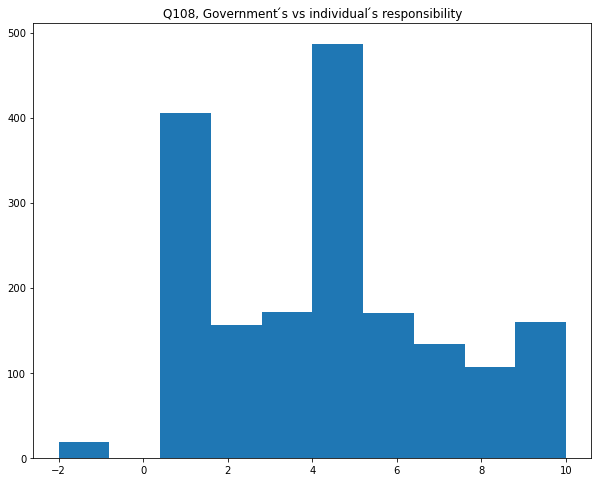

[ 1  9  6 -1  4  2  5  7  3 10  8]


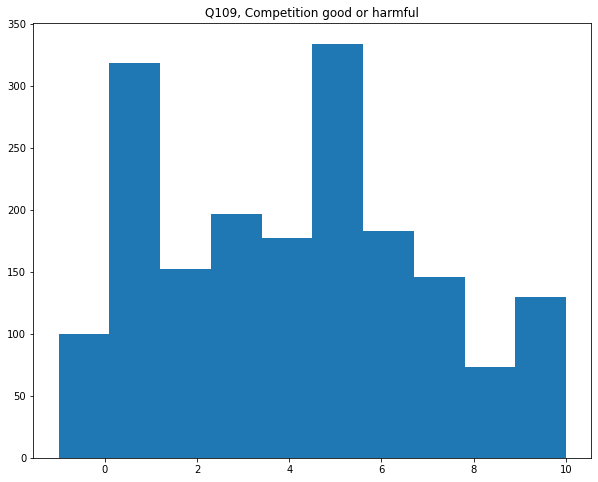

[ 4  3 -1  2 -2  1]


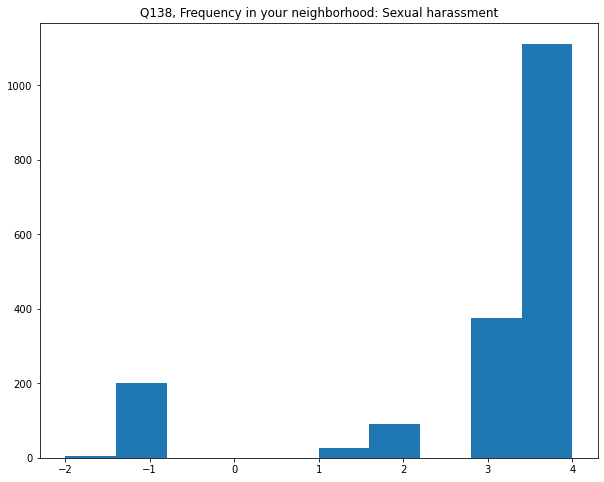

[ 6  9  5  1 10  7  3 -1  4  2  8 -2]


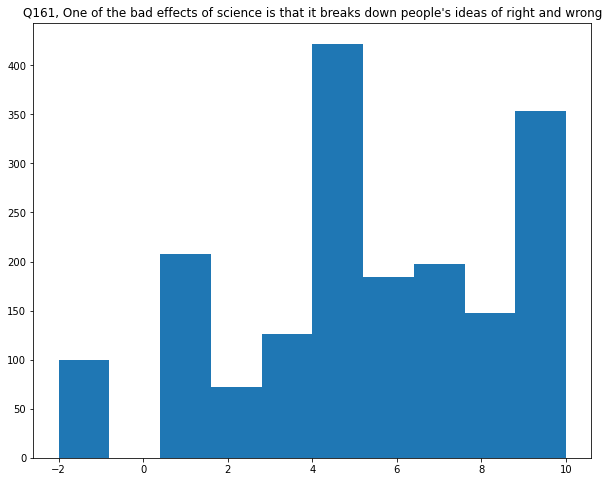

[ 3  5  4  2 -2  6  8  7 -1  1]


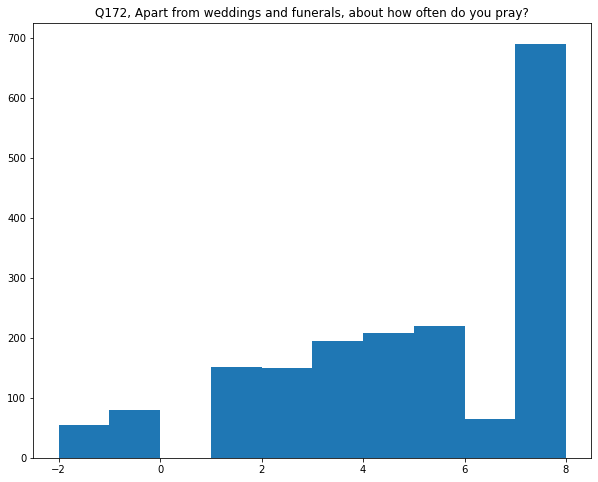

[ 2  3  5  1  4 -1 -2]


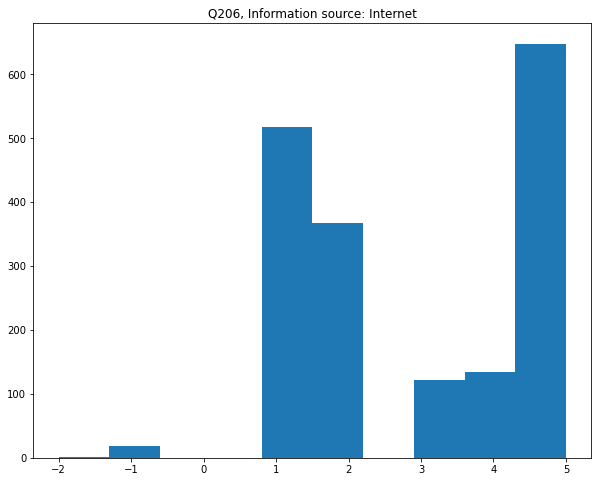

[ 2  3  1 -1 -2]


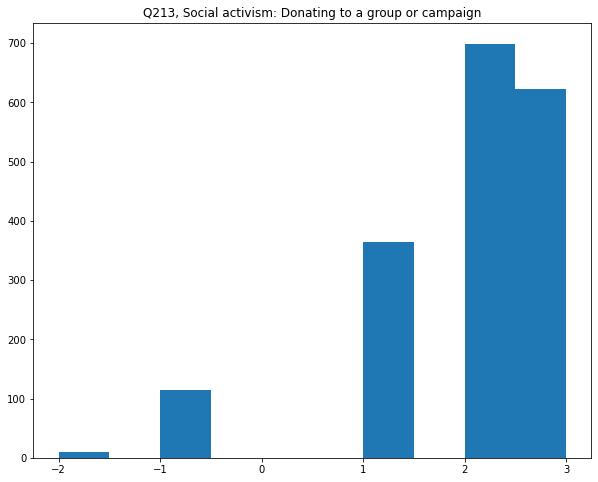

[ 1  2  3 -1  4 -2]


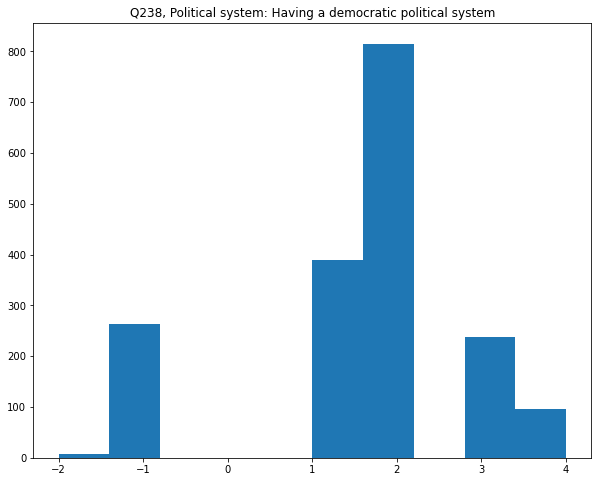

[ 3  7  8  4  5  6 -1 10  9  1  2 -2]


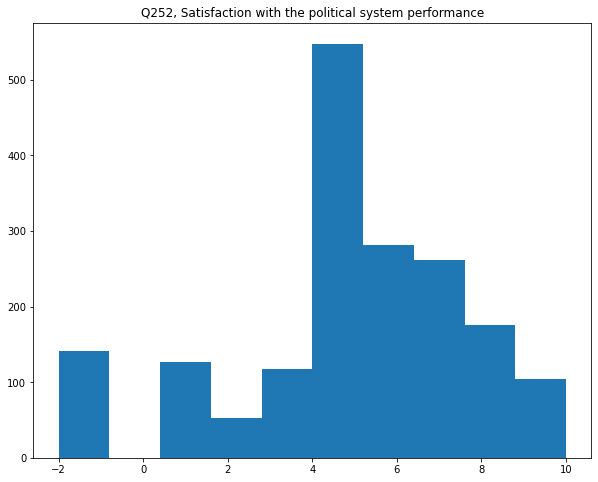

[2 1]


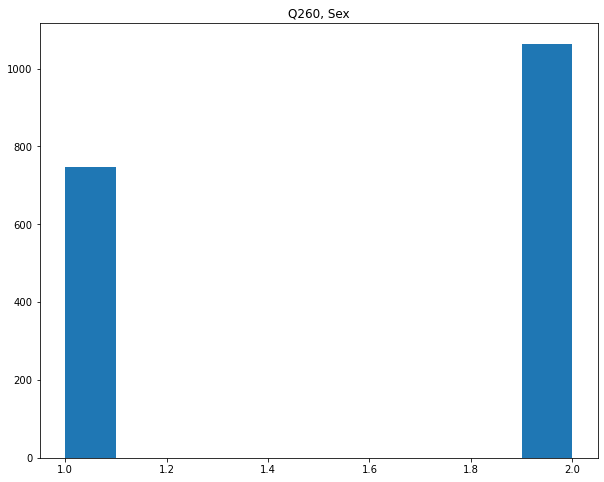

[36 58 42 47 61 69 40 78 51 28 48 72 73 80 20 26 24 57 60 67 27 71 34 43
 70 68 53 66 52 45 49 41 62 32 56 54 25 64 39 55 74 59 44 37 18 33 29 50
 35 65 21 31 23 22 46 30 76 82 63 75 19 86 81 87 90 38 85 77 83 79 84 88
 91]


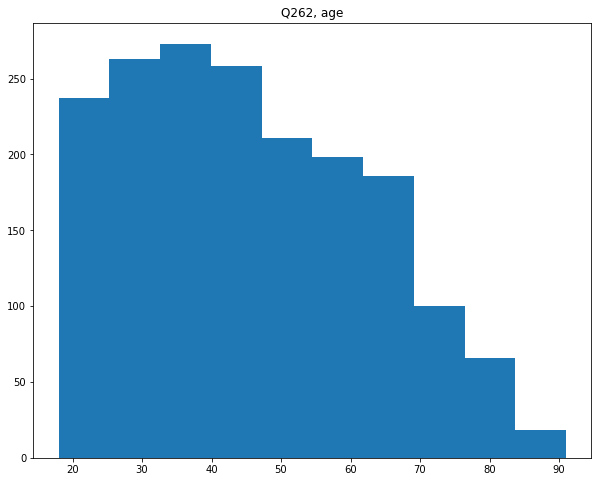

[ 2  1 -2]


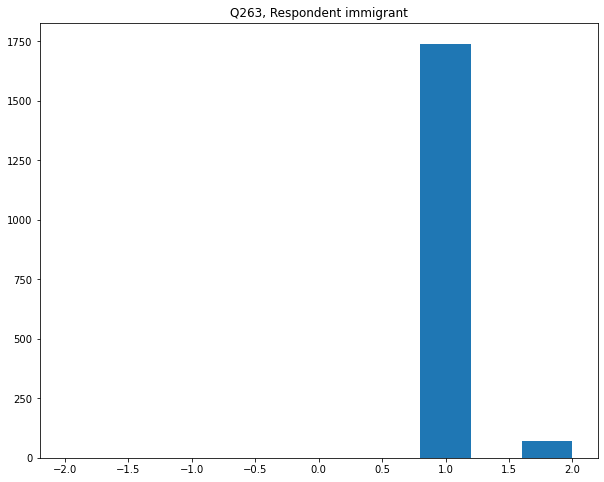

[ 1 -5  2 -2  3  4]


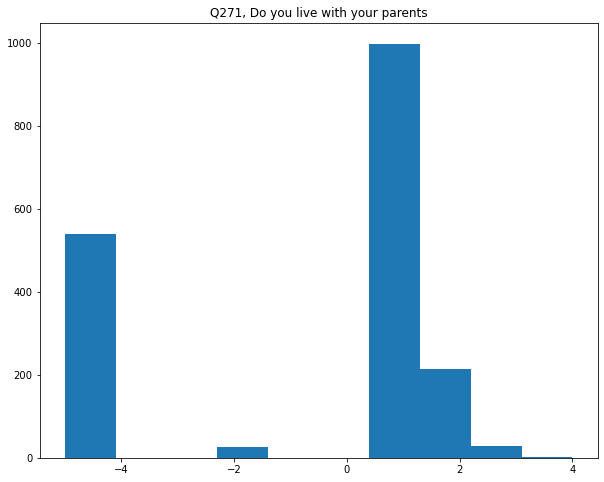

[ 1  6  5  4  3  2 -2]


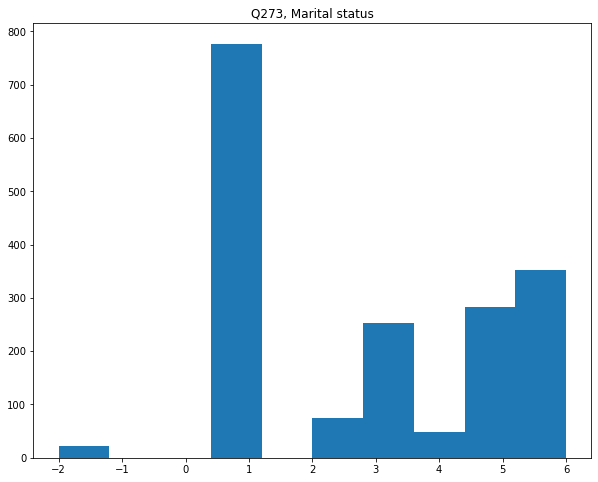

[2 1 0 3 6 9 4 5]


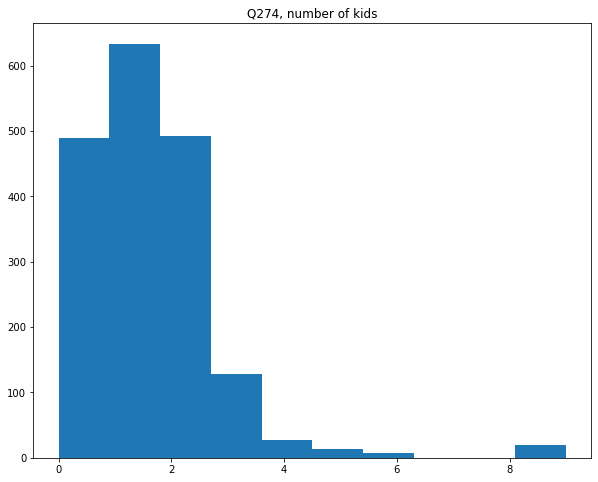

[ 3  1  2 -1]


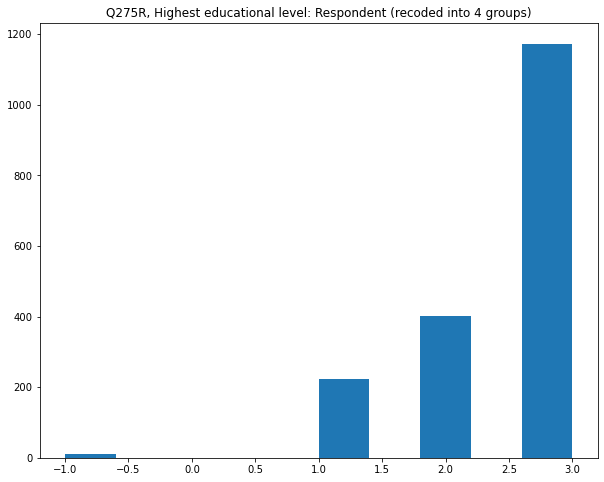

[ 5  1  4  3  6  2  7 -1 -2]


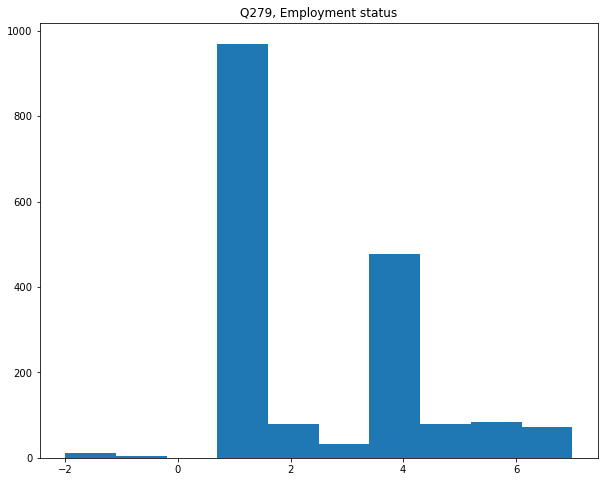

[ 8  6  3  4  5  9 -1  7  1  2 -2 10]


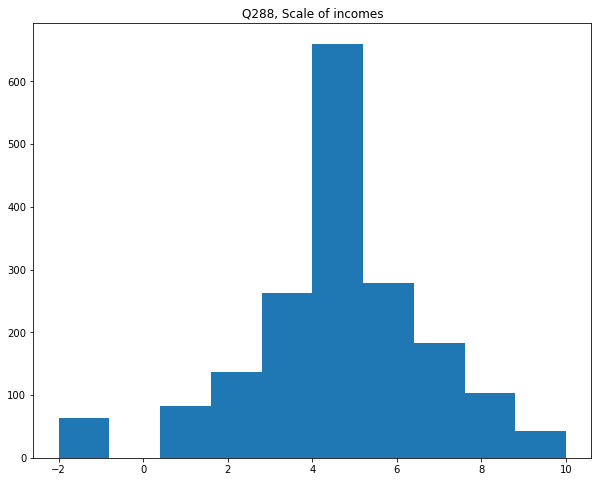

[ 5  8  3  9  2  4  6 10  1 -1  7 -2]


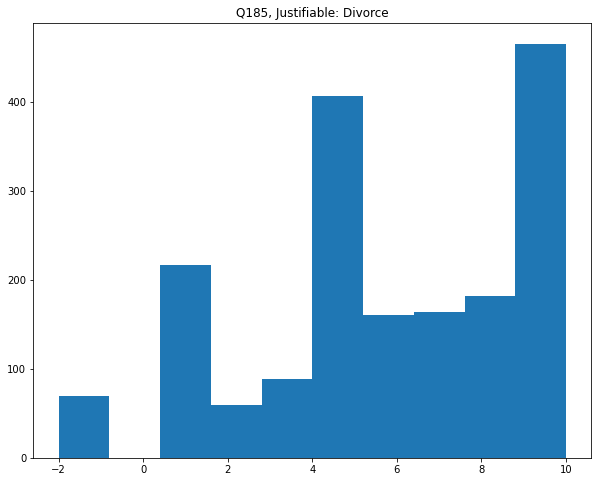

[ 8  9  3 10  2  6  5  4  1  7 -1 -2]


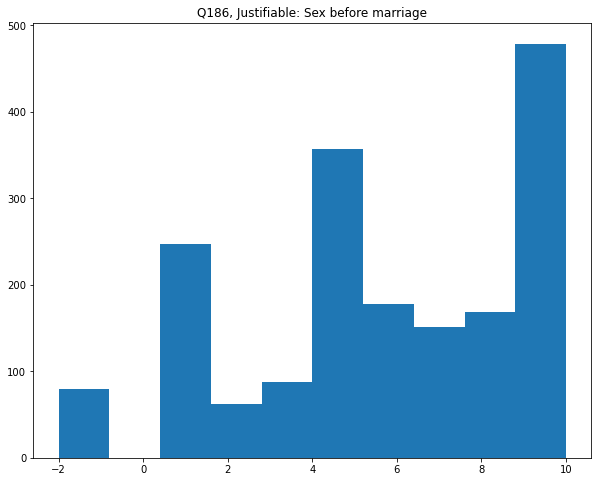

In [7]:
for col in df_nec.columns:
    plt.figure(figsize=(10,8))
    print(df_nec[col].unique())
    plt.title(f"{col}, {d[col]}")
    plt.hist(df_nec[col])
    plt.show()

#### Compare survey age distributions with 2017 stats

In [8]:
df_stat=pd.read_csv('ages_2017.csv', header=None, names=['age_min','age_max','total','male_total','female_total',
                                                  'total_urban','male_urban','female_urban',
                                                   'total_rural','male_rural','female_rural'])
df_stat=df_stat[:-1] 
popul_normed = df_stat['total'] / df_stat['total'].sum()

In [9]:
df_stat.head()

,age_min,age_max,total,male_total,female_total,total_urban,male_urban,female_urban,total_rural,male_rural,female_rural
0,0.0,4.0,9581740,4923684,4658056,7005894,3600662,3405232,2575846,1323022,1252824
1,5.0,9.0,8558662,4389167,4169495,6081392,3119305,2962087,2477270,1269862,1207408
2,10.0,14.0,7408271,3791237,3617034,5246041,2684632,2561409,2162230,1106605,1055625
3,15.0,19.0,6689989,3418141,3271848,4823795,2454068,2369727,1866194,964073,902121
4,20.0,24.0,7827731,3993373,3834358,5846699,2937833,2908866,1981032,1055540,925492


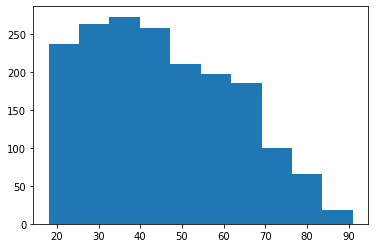

In [10]:
plt.hist(df_nec['Q262']);

In [11]:
n_bins = 21
#get space for min and max ages
tmp1 = [None] * n_bins
tmp2 = [None] * n_bins

#define bins
for i in range(n_bins):
    tmp1[i] = 5 * i
    tmp2[i] = 5 * i + 4
df_bins=pd.DataFrame({'age_min':tmp1, 'age_max':tmp2})
#define column for number of respondents in the given range
df_bins['count'] = 0
#distribute respondent ages
for i in df_nec['Q262']:
    df_bins['count'].loc[i // 5] += 1

In [12]:
df_bins['count'].sum()

1810

In [13]:
df_bins['count_normed'] = df_bins['count'] / df_bins['count'].sum()

In [14]:
df_bins.head()

,age_min,age_max,count,count_normed
0,0,4,0,0.000000
1,5,9,0,0.000000
2,10,14,0,0.000000
3,15,19,60,0.033149
4,20,24,135,0.074586


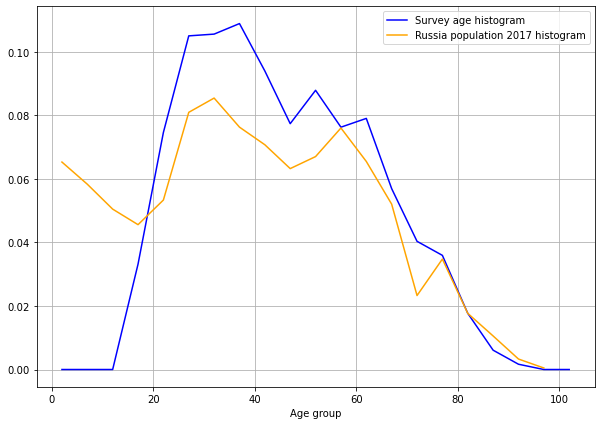

In [15]:
plt.figure(figsize=(10,7))

plt.plot((df_bins['age_min']+df_bins['age_max'])*0.5, df_bins['count_normed'], color = 'b', label='Survey age histogram')
plt.plot((df_stat['age_min']+df_stat['age_max'])*0.5, popul_normed, color = 'orange', label='Russia population 2017 histogram')
plt.legend()
plt.xlabel('Age group')
plt.grid()
plt.show()

In [17]:
pearsonr(popul_normed, df_bins['count_normed'])[0]

0.7622138657092737

#### Replace NaNs

In [4]:
#dataset with replaced nans
df_nec_nans = df_nec.replace([-1,-2,-4,-5], np.nan)
#define squared age
df_nec_nans["Q262sq"] = np.square(df_nec_nans["Q262"]) 

In [5]:
#number of nans in each column
cols_nan = df_nec_nans.isna().sum()
cols_nan = cols_nan[np.argsort(cols_nan * -1)]
for col in cols_nan.index:
    print(f"{col:>5}, {cols_nan[col]:>3}, {d[col]}")

 Q271, 565, Do you live with your parents
 Q238, 271, Political system: Having a democratic political system
 Q138, 206, Frequency in your neighborhood: Sexual harassment
 Q252, 141, Satisfaction with the political system performance
 Q172, 133, Apart from weddings and funerals, about how often do you pray?
 Q213, 124, Social activism: Donating to a group or campaign
 Q161, 100, One of the bad effects of science is that it breaks down people's ideas of right and wrong
 Q109, 100, Competition good or harmful
 Q186,  79, Justifiable: Sex before marriage
 Q185,  69, Justifiable: Divorce
 Q288,  63, Scale of incomes
  Q69,  51, Confidence: The Police
 Q273,  23, Marital status
  Q67,  21, Confidence: Television
 Q206,  20, Information source: Internet
 Q108,  19, Government ́s vs individual ́s responsibility
  Q33,  17, Jobs scarce: Men should have more right to a job than women
   Q3,  17, Importance in life: Leisure time
 Q279,  15, Employment status
   Q5,  14, Importance in life: Work


In [6]:
#fill in nans with medians
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_nec_nans)
df_nec_nans_med = imputer.transform(df_nec_nans)
df_nec_nans_med = pd.DataFrame(data = df_nec_nans_med, columns= df_nec_nans.columns.values)

In [7]:
#make Q273, Q279 one hot and drop original
df_nec_nans_med["Q273ed"] = np.where(df_nec_nans_med["Q273"]<3,1,0) #?make one-hot all answers !
df_nec_nans_med["Q279ed"] = np.where(df_nec_nans_med["Q279"]<4,1,0)
df_nec_nans_med.drop(["Q273","Q279"], axis=1, inplace=True)


# take age over 20 and drop first two columns with lots of nans
df_nec_nans_med = df_nec_nans_med[ df_nec_nans_med['Q262'] >= 20 ].reset_index(drop=True)
# .drop(['Q271','Q238'], axis=1).reset_index(drop=True)



In [15]:
df_nec_nans_med.shape

(1750, 37)

##### One-hot encoding for some columns

In [11]:
one_hot_cols = ["H_URBRURAL","Q18","Q19","Q20","Q21","Q22","Q23","Q24","Q260","Q263","Q273ed","Q279ed"]
df = pd.get_dummies(df_nec_nans_med,
    prefix=one_hot_cols, 
   columns=one_hot_cols)
one_hot_cols = ['H_URBRURAL_1.0', 'H_URBRURAL_2.0', 'Q18_1.0',
       'Q18_2.0', 'Q19_1.0', 'Q19_2.0', 'Q20_1.0', 'Q20_2.0', 'Q21_1.0',
       'Q21_2.0', 'Q22_1.0', 'Q22_2.0', 'Q23_1.0', 'Q23_2.0', 'Q24_1.0',
       'Q24_2.0', 'Q260_1.0', 'Q260_2.0', 'Q263_1.0', 'Q263_2.0', 'Q273ed_0',
       'Q273ed_1', 'Q279ed_0', 'Q279ed_1']

In [12]:
df.shape

(1750, 49)

##### Min-max scaler for continuous columns

feat -> log(1+feat)

In [13]:
cols = ["Q1","Q3","Q5","Q33","Q47","Q58","Q67","Q69","Q108","Q109","Q138","Q161","Q172","Q206","Q213","Q252","Q262","Q262sq","Q274","Q275R","Q288"]
df_tmp = df[cols]
# df_tmp = df.drop(one_hot_cols, axis=1)
sc = MinMaxScaler()
sc.fit(df_tmp)
df_sc = sc.transform(df_tmp)
df_sc = pd.DataFrame(data=df_sc, columns = cols)

for col in cols:
    df[col] = df_sc[col]

In [13]:
df.head()

,Q1,Q3,Q5,Q33,Q47,Q58,Q67,Q69,Q108,Q109,Q138,Q161,Q172,Q206,Q213,Q238,Q252,Q262,Q271,Q274,Q275R,Q288,Q185,Q186,Q262sq,H_URBRURAL_1.0,H_URBRURAL_2.0,Q18_1.0,Q18_2.0,Q19_1.0,Q19_2.0,Q20_1.0,Q20_2.0,Q21_1.0,Q21_2.0,Q22_1.0,Q22_2.0,Q23_1.0,Q23_2.0,Q24_1.0,Q24_2.0,Q260_1.0,Q260_2.0,Q263_1.0,Q263_2.0,Q273ed_0,Q273ed_1,Q279ed_0,Q279ed_1
0,0.000000,0.000000,0.333333,0.25,0.00,0.000000,0.333333,0.666667,0.000000,0.000000,1.000000,0.555556,0.285714,0.25,0.5,1.0,0.222222,0.225352,1.0,0.222222,1.0,0.777778,5.0,8.0,0.113691,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
1,0.000000,0.333333,0.333333,0.75,0.25,0.333333,0.333333,0.333333,0.111111,0.888889,1.000000,0.888889,0.285714,0.50,1.0,1.0,0.666667,0.535211,1.0,0.222222,1.0,0.555556,8.0,9.0,0.376094,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1
2,0.333333,0.333333,0.000000,0.75,0.25,0.333333,0.333333,0.333333,1.000000,0.555556,1.000000,0.555556,0.571429,0.25,0.5,1.0,0.777778,0.309859,1.0,0.222222,1.0,0.555556,3.0,9.0,0.173074,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1
3,0.333333,0.666667,0.000000,1.00,0.50,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667,0.444444,0.428571,0.50,1.0,2.0,0.333333,0.380282,1.0,0.111111,1.0,0.222222,9.0,3.0,0.229539,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
4,0.000000,0.666667,0.000000,0.75,0.50,0.000000,1.000000,0.333333,0.666667,0.555556,1.000000,0.000000,0.285714,0.25,0.5,2.0,0.222222,0.577465,1.0,0.222222,1.0,0.333333,8.0,10.0,0.421393,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1


In [17]:
c = df.corr(method='pearson')

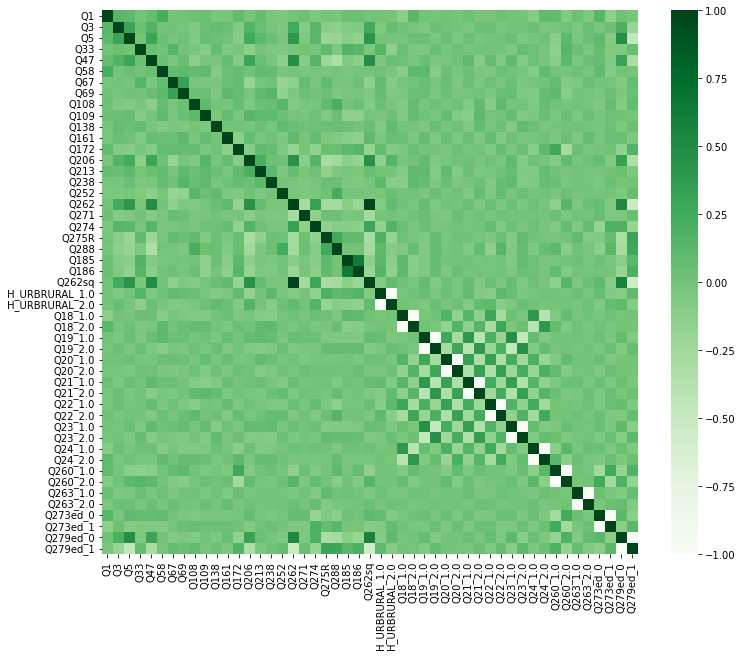

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(c, 
        xticklabels=c.columns,
        yticklabels=c.columns,cmap="Greens");

In [ ]:
# c[np.abs(c) < 0.5]

#### Q185

In [19]:
d['Q185']

'Justifiable: Divorce'

In [20]:
X = df.drop(columns=['Q185', 'Q186'])
pred_feat = 'Q185'
y = df[pred_feat]

In [21]:
# X = np.log(1 + X)

In [22]:
np.random.seed(17)
for _ in range(10):
    r = np.random.randint(1, 200)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, shuffle=True,  random_state = r)
    X_train2 = sm.add_constant(X_train)
    X_test2 = sm.add_constant(X_test)

    est = sm.OLS(y_train, X_train2)
    est_fitted = est.fit()
    pred_test = est_fitted.predict(X_test2)
    print(f"R2 out-of-sample: {r2_score(y_test, pred_test)}")

/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/mansur

R2 out-of-sample: 0.07763374316357419
R2 out-of-sample: 0.05257249339525427
R2 out-of-sample: 0.06287863291194529
R2 out-of-sample: 0.03015714205989517
R2 out-of-sample: 0.0788009714697957
R2 out-of-sample: 0.08153883349524893
R2 out-of-sample: 0.05160453312849367
R2 out-of-sample: 0.10637480565917379
R2 out-of-sample: 0.1160529530488621
R2 out-of-sample: 0.09155071033023976


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, shuffle=True,  random_state = 13)

X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

est = sm.OLS(y_train, X_train2)
est_fitted = est.fit()
pred_test = est_fitted.predict(X_test2)
print(f"R2 out-of-sample: {r2_score(y_test, pred_test)}")
print("\n")
print(est_fitted.summary())

In [ ]:
pred_feat

In [ ]:
plt.figure(figsize=(10,8))
n = 50
plt.scatter(range(y_test.shape[0])[:n], y_test[:n], label='y_true out-of-sample')
plt.scatter(range(pred_test.shape[0])[:n], pred_test[:n], label = 'y_predicted out-of-sample')
plt.title(f"{pred_feat} : {d[pred_feat]}")
plt.legend()
plt.show()


#### Q186

In [ ]:
X = df.drop(columns=['Q185', 'Q186'])
pred_feat = 'Q186'
y = df[pred_feat]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

# regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
# regr.fit(X_train, y_train)
# predicted_train = regr.predict(X_train)
# predicted_test = regr.predict(X_test)


In [ ]:
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

est = sm.OLS(y_train, X_train2)
est_fitted = est.fit()
pred_test = est_fitted.predict(X_test2)
print(f"R2 out-of-sample: {r2_score(y_test, pred_test)}")
print("\n")
print(est_fitted.summary())

In [ ]:
from PIL import Image, ImageDraw, ImageFont
image = Image.new('RGB', (800, 400))
draw = ImageDraw.Draw(image)
# font = ImageFont.truetype("arial.ttf", 16)
draw.text((0, 0), str(est_fitted.summary()))
image = image.convert('1') # bw
image = image.resize((600, 300), Image.ANTIALIAS)
image.save('output.png')

In [ ]:
plt.figure(figsize=(10,8))
n = 50
plt.scatter(range(y_test.shape[0])[:n], y_test[:n], label='y_true_test')
plt.scatter(range(pred_test.shape[0])[:n], pred_test[:n], label = 'y_predicted_test')
plt.title(f"{pred_feat} : {d[pred_feat]}")
plt.legend()
plt.show()


## Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(
   init="random",
   n_clusters=3,
   n_init=10,
   max_iter=300,
   random_state=42)

In [ ]:
kmeans.fit(df)

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)
    

In [ ]:
kmeans.labels_[:5]

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 13), sse)
plt.xticks(range(1, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
    

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
df.columns

## Linear Regression on the whole dataset

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(f"R2 on the whole dataset: {r2_score(y, est2.predict(X2))}")
print("\n")
print(est2.summary())

## Linear Regression

#### Split to train and test

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y,
        test_size = 0.30,
        random_state=42,
        shuffle=True)

In [ ]:

X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print ("In-Sample: %s" % r2_score(y_train, est2.predict(X2_train)))
print ("Out-of-Sample: %s" % r2_score(y_test, est2.predict(X2_test)))
print("\n")
print(est2.summary())
   

#### boosting

In [ ]:
GPUn=0
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y,
        test_size = 0.30,
        random_state=42,
        shuffle=False)

eval_set = [(X_train, y_train), (X_test, y_test)] #errors log container
bst = xgb.XGBRegressor(objective ='reg:squarederror', 
                   max_depth=5, 
                   n_estimators=1000, #1000 
                   eta = 0.05,
                   random_state = 42,
                   tree_method='gpu_hist', 
                   gpu_id=GPUn)
bst.fit(X_train, y_train, eval_set=eval_set, eval_metric= "rmse", verbose=False)
y_pred = bst.predict(X_test)
r2_out = metrics.r2_score(y_test, y_pred)
sp_out = pd.DataFrame({"y_test":y_test, "y_pred":y_pred}).corr(method="spearman")["y_test"]["y_pred"] #spearman


In [ ]:
r2_out,sp_out

In [ ]:
# data['q'] = data['q'].astype('category')
# data['q'] = data['q'].cat.reorder_categories(['old', 'ren', 'new'], ordered=True)
# data['q'] = data['q'].cat.codes

In [ ]:
cols = list()
for i in range(177,196):
    cols.append('Q'+str(i))

In [ ]:
df_col = df_r[cols]

In [ ]:
df_col.head()

In [ ]:
# with open("only_rus_q177_195.pck", "bw") as f:
#     pickle.dump(df_col, f)

In [ ]:
# with open("only_rus_q177_195.pck", "br") as f:
#     df_col=pickle.load(f)


In [ ]:
len(df_col.Q179)

In [ ]:
df_col.Q179.value_counts()

In [ ]:
df1 = pd.DataFrame()
for col in df_col.columns:
    df1[col] = df_col[col].replace(-1,np.nan)
    df1[col] = df_col[col].replace(-2,np.nan)
    df1[col] = df_col[col].replace(-4,np.nan)
    df1[col] = df_col[col].replace(-5,np.nan)

In [ ]:
df1.isna().sum()

In [ ]:
df1.dropna(axis=1, inplace=True)

In [ ]:
len(df1)

In [ ]:
df1 = df1/10

In [ ]:
df1.

In [ ]:
from seaborn import distplot, pairplot

In [ ]:
pairplot(df1)

## Corr matrix and heatmap

In [ ]:
c = df1.corr(method='pearson')

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(c, 
        xticklabels=c.columns,
        yticklabels=c.columns,cmap="Greens");

## Define features and target

In [ ]:
X = df1.drop(columns=['Q186'])
y = df1['Q186']

## Split to train and test

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y,
        test_size = 0.30,
        random_state=42,
        shuffle=True)

## Linear Regression

In [ ]:

X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print ("In-Sample: %s" % r2_score(y_train, est2.predict(X2_train)))
print ("Out-of-Sample: %s" % r2_score(y_test, est2.predict(X2_test)))
print("\n")
print(est2.summary())
   

## XGBoost fit

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)] #error logs container during training
bst = xgb.XGBRegressor(objective ='reg:squarederror',
                       max_depth=5,
                       n_estimators=200,
                       eta = 0.03,
                       tree_method='gpu_hist', 
                       gpu_id=3)
bst.fit(X_train, y_train, eval_set=eval_set, eval_metric= "rmse", verbose=False)
print ("Out-of-Sample: %s" % metrics.r2_score(y_test, bst.predict(X_test)))
print ("In-Sample: %s" % metrics.r2_score(y_train, bst.predict(X_train)))

In [ ]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(100, 100))
xgb.plot_tree(bst, num_trees=4, ax=ax)
plt.show()

In [ ]:
df_r_test = df_r[(df_r.Q1.isin([1,2,3,4])) & (df_r.Q2.isin([1,2,3,4]))][['Q1','Q2']]

In [ ]:
len(df_r_test)

In [ ]:
n = np.sum(df_r_test)

In [ ]:
n

In [ ]:
import scipy.stats as stats
X2 = stats.chi2_contingency(df_r_test, correction=False)[0]

In [ ]:
X2

In [ ]:
n = np.sum(df_r_test)
minDim = min(df_r_test.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)

In [ ]:
df_r_test.groupby().count() 

In [ ]:
plt.hist(df_r.Q177, bins = 50);


In [ ]:
df_r.Q177.mean()

In [ ]:
df_r.Q177.std()

In [ ]:
len(df_r.Q177)

In [ ]:
df_r.replace(-5,np.nan,inplace=True)
df_r.replace(-4,np.nan,inplace=True)
df_r.replace(-2,np.nan,inplace=True)
df_r.replace(-1,np.nan,inplace=True)


# -1-.- Don´t know
# -2-.- No answer
# -4-.- Not asked
# -5-.- Missing; Not available

In [ ]:
df_r.dropna(axis=0,inplace=True)